In [1]:
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import plot_basic

In [2]:
ds=np.concatenate([np.arange(2, 11), np.arange(12, 38, 2), np.arange(40, 100, 4), [128]])

In [3]:
def hit_time(error_rel):
    return np.where((error_rel < 0.04) & (error_rel > 0.00001))[0][0]

In [7]:
# whether to load the raw data
load_raw = False
cK = 4

if load_raw:
    file_name_template = '/cluster/scratch/chenyua/HMC/results/warm_gaussian_nonisotropic_d%d_cK%d_iters40000_exps1000_seed%d.npy'
    repeats = 10
    hit_mala = np.zeros((ds.shape[0], repeats))
    hit_hmc = np.zeros((ds.shape[0], repeats))
    hit_hmcagg = np.zeros((ds.shape[0], repeats))
    hit_rwmh = np.zeros((ds.shape[0], repeats))
    for i in range(ds.shape[0]):
        for j in range(repeats):
            A = np.load(f_seed_name %(ds[i], cK, j), encoding='latin1', allow_pickle=True)
            hit_mala[i, j-1] = hit_time(A[()]['mala'])
            hit_hmc[i, j-1] = hit_time(A[()]['hmc']) * A[()]['K_hmc']
            hit_hmcagg[i, j-1] = hit_time(A[()]['hmcagg']) * A[()]['K_hmcagg']
            hit_rwmh[i, j-1] = hit_time(A[()]['rwmh'])
    hit_mala_av = np.mean(hit_mala, axis=1)
    hit_hmc_av = np.mean(hit_hmc, axis=1)
    hit_hmcagg_av = np.mean(hit_hmcagg, axis=1)
    hit_rwmh_av = np.mean(hit_rwmh, axis=1)
    result = {}
    result['ds'] = ds
    result['hit_mala_av'] = hit_mala_av
    result['hit_hmc_av'] = hit_hmc_av
    result['hit_hmcagg_av'] = hit_hmcagg_av
    result['hit_rwmh_av'] = hit_rwmh_av

    np.save('cache/cache_warm_gaussian_nonisotropic_d_cK%d.npy' %cK, result)
    
    hit_mala_av = np.mean(hit_mala, axis=1)
    hit_hmc_av = np.mean(hit_hmc, axis=1)
    hit_hmcagg_av = np.mean(hit_hmcagg, axis=1)
    hit_rwmh_av = np.mean(hit_rwmh, axis=1)
else:
    # load local saved hitting times
    A = np.load('cache/cache_warm_gaussian_nonisotropic_d_cK%d.npy' %cK, encoding='latin1', allow_pickle=True)
    ds = A[()]['ds']
    hit_mala_av= A[()]['hit_mala_av']
    hit_hmc_av = A[()]['hit_hmc_av']
    hit_hmcagg_av = A[()]['hit_hmcagg_av']
    hit_rwmh_av= A[()]['hit_rwmh_av'] 


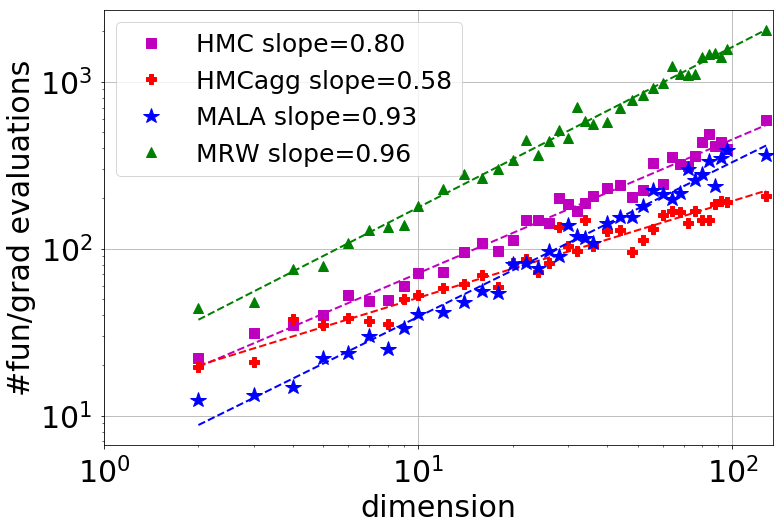

In [8]:
plt.figure(figsize=(12., 8.))
log_d = np.log(ds)

log_mala = np.log(hit_mala_av)
log_hmc = np.log(hit_hmc_av)
log_hmcagg = np.log(hit_hmcagg_av)
log_rwmh = np.log(hit_rwmh_av)

log_mala_fit = np.polyfit(log_d, log_mala, deg=1)
log_hmc_fit = np.polyfit(log_d, log_hmc, deg=1)
log_hmcagg_fit = np.polyfit(log_d, log_hmcagg, deg=1)
log_rwmh_fit = np.polyfit(log_d, log_rwmh, deg=1)


line, = plt.plot(ds, hit_hmc_av, 'ms', markersize=10.)
line.set_label('HMC slope=%.2f' % log_hmc_fit[0])
plt.plot(ds, np.exp(log_hmc_fit[0] * log_d + log_hmc_fit[1]), 'm--')

line, = plt.plot(ds, hit_hmcagg_av, 'rP', markersize=10.)
line.set_label('HMCagg slope=%.2f' % log_hmcagg_fit[0])
plt.plot(ds, np.exp(log_hmcagg_fit[0] * log_d + log_hmcagg_fit[1]), 'r--')

line, = plt.plot(ds, hit_mala_av, 'b*', markersize=16.)
line.set_label('MALA slope=%.2f' % log_mala_fit[0])
plt.plot(ds, np.exp(log_mala_fit[0] * log_d + log_mala_fit[1]), 'b--')

line, = plt.plot(ds, hit_rwmh_av, 'g^', markersize=10.)
line.set_label('MRW slope=%.2f' % log_rwmh_fit[0])
plt.plot(ds, np.exp(log_rwmh_fit[0] * log_d + log_rwmh_fit[1]), 'g--')


plt.xscale('log')
plt.yscale('log')

plt.legend(loc='upper left', frameon=True, fancybox=True)

plt.xlabel('dimension')
plt.ylabel('#fun/grad evaluations')

plt.xlim(1, 135)
plt.grid(which='major')

#plt.grid(which='minor')

plt.savefig('figs/warm_gaussian_nonisotropic_d_dependency_10run.pdf')
plt.show()

In [9]:
log_mala_fit[0], log_hmc_fit[0], log_hmcagg_fit[0], log_rwmh_fit[0]

(0.927133616249047, 0.8022220053588173, 0.5799515176852396, 0.9621713259798129)

In [10]:
def std_slope(log_d, log_m, log_m_fit):
    return np.sqrt(np.sum((log_m - (log_d * log_m_fit[0] + log_m_fit[1]))**2/(len(log_d)-2)))

In [11]:
std_slope(log_d, log_mala, log_mala_fit)

0.13438672290215123

In [12]:
std_slope(log_d, log_hmc, log_hmc_fit)

0.11532655146231752

In [13]:
std_slope(log_d, log_rwmh, log_rwmh_fit)

0.09806008189326361

In [14]:
std_slope(log_d, log_hmcagg, log_hmcagg_fit)

0.14531427133277547